# Определение возраста покупателей

**Описание проекта:**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
* Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
* Контролировать добросовестность кассиров при продаже алкоголя.

**Данные:**
Набор фотографий людей с указанием возраста.

**Цель:**
Построить модель, которая по фотографии определяет приблизительный возраст человека.

**Задача:**
1. Провести исследовательский анализ набора фотографий.
2. Подготовить данные к обучению.
3. Обучить нейронную сеть и рассчитать её качество.

## Импорт библиотек

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt

## Исследовательский анализ данных

In [2]:
# Сохраняем путь в файлам
path = '/datasets/faces/'

In [3]:
# Загружаем файл с метками
target = pd.read_csv(path + 'labels.csv')
display(target.head())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
# Вывод основной информации по таблице
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# Вывод основных статистик
display(target.describe())

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [6]:
# Вывод размера выборки
print(target.shape)

(7591, 2)


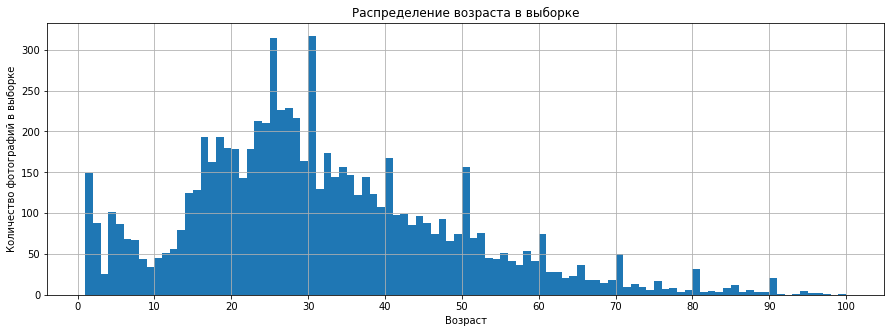

In [7]:
# Гистограмма распределения возраста в выборке
fig, ax = plt.subplots()
target['real_age'].hist(bins=99, figsize=(15, 5))
plt.title('Распределение возраста в выборке')
plt.xlabel('Возраст')
plt.ylabel('Количество фотографий в выборке')
ax.set_xticks(range(0, 101, 10));

In [8]:
# Доля клиентов до 18 лет в выборке
print('Доля клиентов до 18 лет в выборке: {}%'.format(round(target[target['real_age'] < 18]['real_age'].count() / 
                                                            target.shape[0] * 100, 
                                                            2)))

Доля клиентов до 18 лет в выборке: 19.8%


In [18]:
target['real_age'] = target['real_age'].astype('str')

In [11]:
# Загрузка изображений из папки
datagen = ImageDataGenerator(rescale=1/255.)
features = datagen.flow_from_dataframe(target, 
                                       path + '/final_files', 
                                       x_col="file_name", 
                                       y_col="real_age", 
                                       class_mode='raw', #'sparse',
                                       seed=12345 #,
                                       #target_size=(224, 224), batch_size=16, subset='training', 
                                      )

Found 7591 validated image filenames.


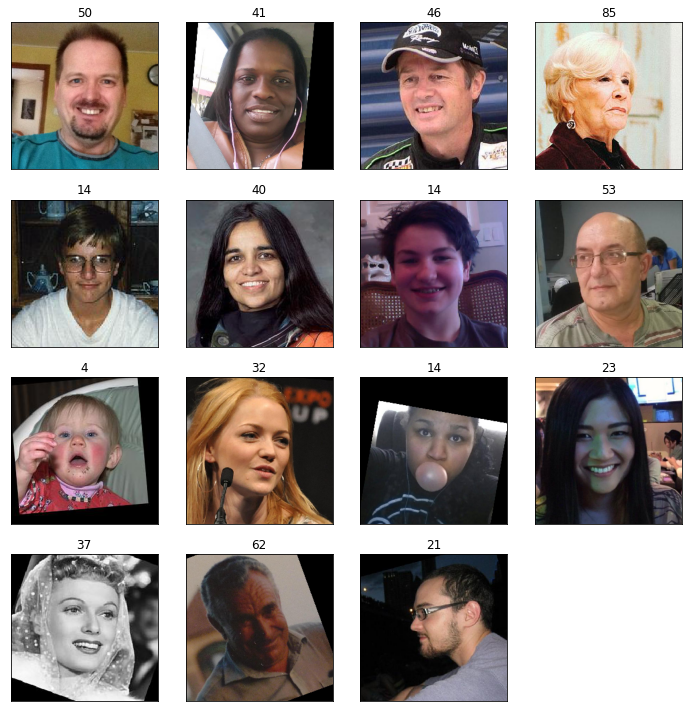

In [12]:
features, target = next(features)

fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.title(target[i])
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [20]:
# Для дальнейшего вывода возраста к подписям на фото создаем словарь 
class_names=features.class_indices
new_dict={}
for key, value in class_names.items():
    new_dict[value]=key

Возраст человека на фото № 1: 30


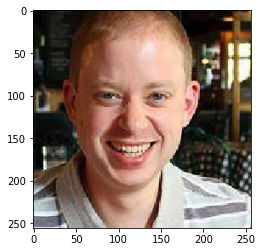

Возраст человека на фото № 2: 23


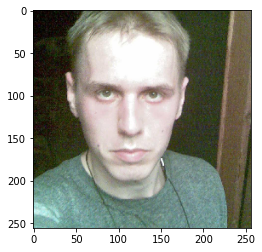

Возраст человека на фото № 3: 13


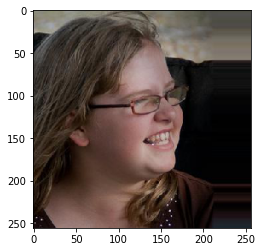

Возраст человека на фото № 4: 2


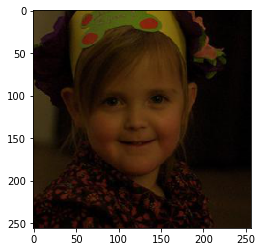

Возраст человека на фото № 5: 60


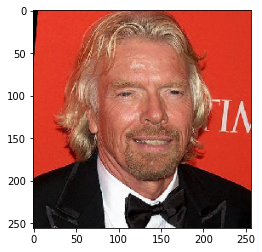

Возраст человека на фото № 6: 20


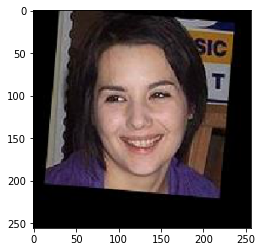

Возраст человека на фото № 7: 49


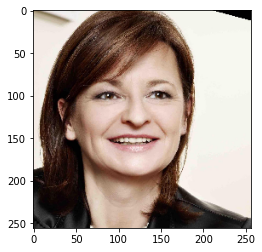

Возраст человека на фото № 8: 63


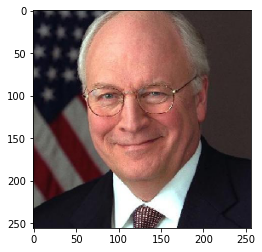

Возраст человека на фото № 9: 58


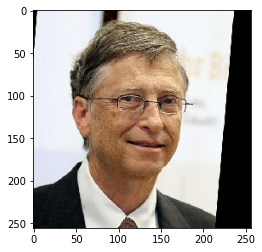

Возраст человека на фото № 10: 15


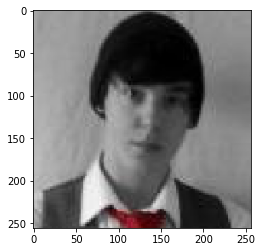

Возраст человека на фото № 11: 19


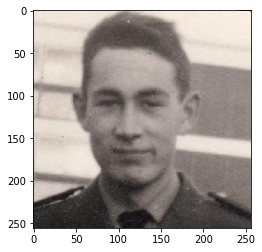

Возраст человека на фото № 12: 24


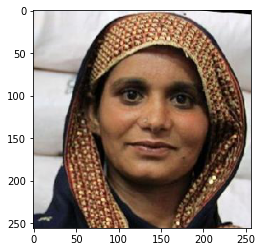

Возраст человека на фото № 13: 26


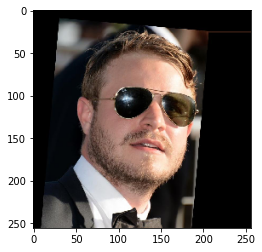

Возраст человека на фото № 14: 39


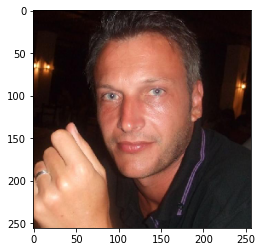

Возраст человека на фото № 15: 13


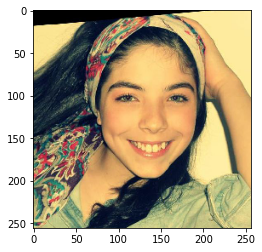

In [24]:
# Вывод 15 изображений на экран
for _ in range(0, 15):
    image, label = features.next()
    label_name=new_dict[label[0]]
    print('Возраст человека на фото № {}: {}'.format(_+1,label_name))
    plt.imshow(image[0])
    plt.show()

**Вывод:**

* В датасете содержатся 7 591 фотография;
* Фотографиям проставлены метки возраста. Несоответствий возраста и фотографии выявлено не было;
* В датасете отсутствуют метки, позволяющие определить группу продуктов для данного возраста;
* Основную часть людей на фотографиях составляют люди возраста от 20 до 41 года;
* В распределении различных возрастов в выборке видны "выбросы" в возрасте, кратном 10. Таким образом, модель может быть склонна к округлению возраста;
* В выборке значительное количество людей с возрастом 1 год. Возможно, обучение модели на фотографиях младенцев будет излишним, т.к. во-первых, они не смогут самостоятельно сделать заказ. Скорее всего с ними будет сопровождающий (родственник, опекун и т.д.), и модель компьютерного зрения нужно будет применить к ним. Во-вторых применение модели к младенцам не имеет смысла, т.к. ассортимент "Хлеб-Соль" не подходит данной возрастной группе;
* В выборке содержится 20% покупателей возраста до 18 лет. Несмотря на смещенный баланс, данного количества фотографий должно быть достаточно для обучения;
* В выборке содержатся фотографии людей разного возраста, пола, национальности, в головных уборах, очках, что улучшает качество модели. Тем не менее выявлено, что большинство людей на фотографиях улыбаются, что может ухудшить качество модели в случае, если клиент не улыбнется во время заказа.

## Обучение модели

```python

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

def load_train(path):
    target = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, 
                                 rescale=1/255., 
                                 vertical_flip=True, 
                                 horizontal_flip=True#, 
                                 #rotation_range = 90, 
                                 #height_shift_range = 0.2,
                                 #width_shift_range = 0.2
                                )
    train_datagen_flow = datagen.flow_from_dataframe(target,
                                                     path + '/final_files',
                                                     x_col="file_name",
                                                     y_col="real_age",
                                                     class_mode='raw',
                                                     subset='training', 
                                                     batch_size=16,
                                                     target_size=(224, 224), 
                                                     seed=12345
                                                    )
    return train_datagen_flow

def load_test(path):
    target = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255.)
    valid_datagen_flow = datagen.flow_from_dataframe(target,
                                                     path + '/final_files',
                                                     x_col="file_name",
                                                     y_col="real_age",
                                                     class_mode='raw',
                                                     subset='validation', 
                                                     batch_size=16,
                                                     target_size=(224, 224),
                                                     seed=12345
                                                    )
    return valid_datagen_flow

def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,
               steps_per_epoch=None, validation_steps=None):
    
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, 
              shuffle=True)
    return model 

```

```
Train for 356 steps, validate for 119 steps
Epoch 1/5
356/356 - 67s - loss: 225.1530 - mae: 11.0832 - val_loss: 652.0333 - val_mae: 20.5222
Epoch 2/5
356/356 - 51s - loss: 114.7638 - mae: 8.0861 - val_loss: 150.1044 - val_mae: 9.1767
Epoch 3/5
356/356 - 50s - loss: 90.4113 - mae: 7.2403 - val_loss: 103.9560 - val_mae: 7.6762
Epoch 4/5
356/356 - 42s - loss: 72.9201 - mae: 6.5085 - val_loss: 80.2245 - val_mae: 6.7582
Epoch 5/5
356/356 - 46s - loss: 58.6610 - mae: 5.8626 - val_loss: 99.7218 - val_mae: 7.4754
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 99.7218 - mae: 7.4754
Test MAE: 7.4754
```

## Анализ обученной модели

* По результатам обучения удалось достигнуть метрики МАЕ=7.5, что означает, что модель определяет возраст с погрешностью плюс/минус 7,5 лет.
* При дальнейшем использовании модели в целях идентификации лиц младше 18 лет, удостоверение личности необходимо будет спрашивать у всех людей, кому модель предсказала возраст меньше 26 лет включительно.
* При формировании предложения купить дополнительные товары, необходимо предлагать товар не только из возрастной группы, определенной моделью, но и из возрастных групп плюс/минус 7,5 лет (кроме алкоголя для лиц младше 18 лет).

## Общий вывод

**1. Выводы по результатам обзора данных**

* В датасете содержатся 7 591 фотография людей возраста от 20 до 41 года. В выборке содержится 20% покупателей возраста до 18 лет.
* В распределении различных возрастов в выборке видны "выбросы" в возрасте, кратном 10. Таким образом, модель может быть склонна к округлению возраста;
* В выборке значительное количество людей с возрастом 1 год. Возможно, обучение модели на фотографиях младенцев будет излишним.
* В выборке содержатся фотографии людей разного возраста, пола, национальности, в головных уборах, очках, что улучшает качество модели. Тем не менее выявлено, что большинство людей на фотографиях улыбаются, что может ухудшить качество модели в случае, если клиент не улыбнется во время заказа.


**2. Выводы по результатам обучения модели**

* Модель определяет возраст с погрешностью плюс/минус 7,5 лет.
* Удостоверение личности при покупке алкоголя необходимо будет спрашивать у всех людей, кому модель предсказала возраст меньше 26 лет включительно.
* Необходимо предлагать дополнительные товары не только из возрастной группы, определенной моделью, но и из возрастных групп плюс/минус 7,5 лет (кроме алкоголя для лиц младше 18 лет).